In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


# PubChem AID 1024

## Assay info

The cytochrome P450 enzymes represent a diverse superfamily of hemoproteins present in eukaryotic, bacterial, and archaean systems. The primary function of these enzymes is in the metabolism and clearance of both endogenous and exogenous (xenobiotic) compounds due to their propensity to metabolize multiple substrates through the catalysis of a range of reactions. CYP2C9 is an important enzyme in this superfamily in its ability to metabolize a diverse range of substrates including non-steroidal anti-infammatory drugs (NSAIDS) and sulfonylureas.


There is a growing body of the evidence that CYP isoforms have multiple compound-binding interacting sites that influence the specific activity of the enzyme. A crystal structure of CYP2C9 in the presence of warfarin demonstrated its binding in a novel allosteric site (Williams et al, (2003), Nature 424, 464-468; PMID: 12861225). Compounds activating CYP2C9 could stimulate metabolism of natural substrates of the enzyme and therefore, could provide valuable tools for their characterization.


The assay was performed at Sanford-Burnham Center for Chemical Genomics, part of MLSCN, as Library Characterization Assay. In the assay, we tested the ability of compounds from MLSMR compound collection to activate the 2C9-catalyzed conversion of the substrate luciferin-H EGE to luciferin EGE detected using luciferase reaction.


In [3]:
df = pd.read_csv("PubChem_AID_1024/AID_1024_datatable_all.csv")

/tmp/ipykernel_22158/916087531.py:1: DtypeWarning: Columns (0,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("PubChem_AID_1024/AID_1024_datatable_all.csv")


In [4]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'AF_5uM',
 'Mean_NC',
 'StdDev_NC',
 'Mean_PC',
 'StdDev_PC']

In [5]:
# first 4 rows are metadata 
df[0:4]

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,AF_5uM,Mean_NC,StdDev_NC,Mean_PC,StdDev_PC
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Activation Factor value at 5 uM of compound,Mean Luminescence signal of negative controls ...,Standard deviation (n=16) of negative controls...,Mean Luminescence signal of positive controls ...,Standard deviation (n=16) of positive controls...
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,cps,cps,cps,cps
3,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN


In [6]:
    df = df.drop(labels=list(range(0, 4)), axis=0).reset_index(
        drop=True
    )

In [7]:
df.head(10)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,AF_5uM,Mean_NC,StdDev_NC,Mean_PC,StdDev_PC
0,1,17406628.0,1218287.0,CCC(=O)NC1=C(C=CC(=C1)C(=O)OCC(=O)C2=CC=CC=C2Cl)C,Active,20.0,NaN,NaN,2.1,297.33,301.88,65422,10333
1,2,17406959.0,6247698.0,CC1=CC=C(C=C1)/C=C/C2=NN=C(O2)C3=CC=C(C=C3)C,Inactive,0.0,NaN,NaN,0.6,297.33,301.88,65422,10333
2,3,17406670.0,833356.0,C1CN(C2=CC=CC=C21)C(=S)NC(=O)COC3=CC=CC=C3Cl,Inactive,3.0,NaN,NaN,1.1,297.33,301.88,65422,10333
3,4,17406638.0,3542312.0,CCC1=CC(=C(S1)NC(=O)C2=CC=CC=C2)C(C3=CC=C(C=C3...,Inactive,0.0,NaN,NaN,0.6,297.33,301.88,65422,10333
4,5,17406869.0,11958382.0,CCCCCNCC1=CC(=CC=C1)Br.Cl,Inactive,0.0,NaN,NaN,0.9,297.33,301.88,65422,10333
5,6,17406602.0,1811564.0,CC1=CC=CC=C1OCCNC(=S)NC2=CC=CC=C2,Inactive,0.0,NaN,NaN,0.9,297.33,301.88,65422,10333
6,7,17406669.0,6872980.0,CC1=CC=CC=C1C(=O)N/N=C/C2=CC=NC=C2,Inactive,0.0,NaN,NaN,0.8,297.33,301.88,65422,10333
7,8,17406764.0,844536.0,CCN1C(=C(C=N1)/C=C/C(=O)NCC2=CN(N=C2C)C)C,Inactive,0.0,NaN,NaN,1,297.33,301.88,65422,10333
8,9,17406597.0,406791.0,C1=CC=C(C=C1)N2C(=NN=N2)C3=CNC4=C3C=C(C=C4)Cl,Inactive,0.0,NaN,NaN,0.7,297.33,301.88,65422,10333
9,10,17406681.0,842961.0,CC1=CN(N=C1)CCC(=O)NNC(=S)NC2=CC(=CC=C2)Cl,Inactive,0.0,NaN,NaN,1,297.33,301.88,65422,10333


In [8]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'AF_5uM', 'Mean_NC', 'StdDev_NC',
       'Mean_PC', 'StdDev_PC'],
      dtype='object')

In [9]:
# lets look at activity

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

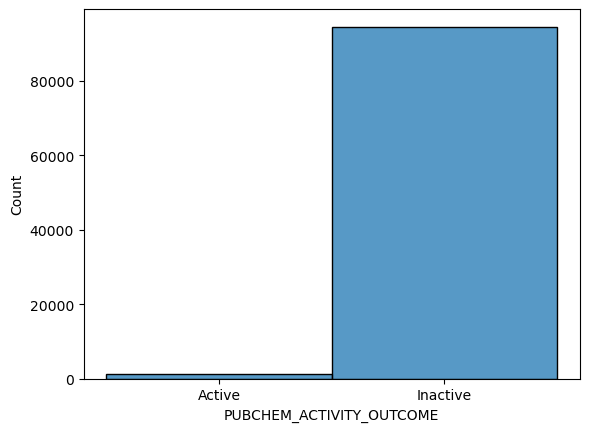

In [10]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")

<Axes: xlabel='PUBCHEM_ACTIVITY_SCORE', ylabel='Count'>

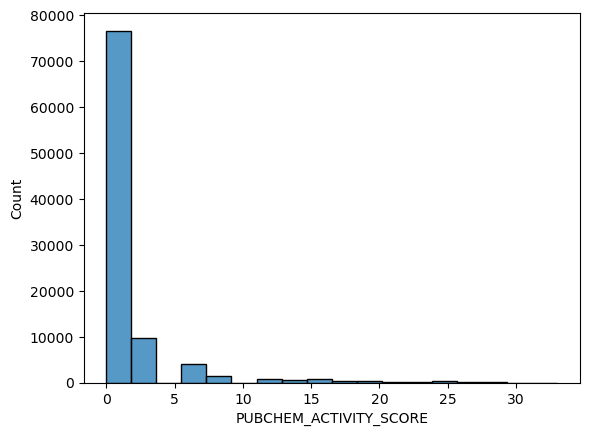

In [11]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_SCORE")

In [12]:
import matplotlib.pyplot as plt

In [13]:
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]

In [14]:
len(df)

95868

In [15]:
df = df.dropna(subset="PUBCHEM_CID")

In [16]:
len(df)

95868

In [17]:
df["PUBCHEM_SID"] = df["PUBCHEM_SID"].astype(int)
df["PUBCHEM_CID"] = df["PUBCHEM_CID"].astype(int)

In [18]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [19]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [ ]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df[mol_col].progress_apply(lambda x: standardize_smiles(x))

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 86993/95868 [06:15<00:41, 213.97it/s]

In [ ]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [ ]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

In [ ]:
df.INCHIKEY.isna().sum() # there are a few that couldn't be standardised

In [ ]:
df.dropna(subset="INCHIKEY")

In [ ]:
# lets gather up the activities?

In [ ]:
# ok, clean up DF, and segement into active and inactives,

In [ ]:
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_CID"]

In [ ]:
clean = df[keep_cols]

In [ ]:
clean["dataset"] = "aid1024"
clean["data_type"] = "assay"

In [ ]:
clean["active"] = clean["PUBCHEM_ACTIVITY_OUTCOME"] == "Active"

In [ ]:
# mols2grid.display(clean, smiles_col="CANONICAL_SMILES")

In [ ]:
clean.head()
clean["common_name"] = pd.NA
clean["action_type"] = "inhibitor"

In [ ]:
clean.to_csv("./processed/AID_1024.csv", index=False)

In [ ]:
# spot checked structures with a few pubchem CIDs, looks like translation went ok